<span style="color:red">Assignment Grade: 9.5</span>

  Q 1a: 10.0

  Q 1b: 10.0

  Q 1c: 11.0

  Q 2: 9.0

  Q 3: 7.5

  Global Deductions: 0.0

  Assignment grade is average of question grades minus global deductions. 

  Comments from pre-grade: Your homework is ready for grading. Tue. Feb 27 at 00:00:19  

  TA comments: 
    * Comment your code! It will pay off immensely when you come back to look at your code later.

# Assignment 2 - Due Friday February 23rd, at 11:59pm

Your completed assignment should be saved in your Bitbucket mp248 repository in the file **Assignment.2/Assignment.2.ipynb**.   

**Do your work in a copy of this i-python notebook.**

**Ensure you label your code blocks** eg: (1)(a), (2)(b), (2)(b)continued, etc.

Please ensure you do not have a copy of the course repository inside your personal mp248 Bitbucket repository. This assignment uses many csv files (from the course repository).  **Do not include** these with your homework, and do not store them on your mp248 repository.  The issue here is that if you store large files in your mp248 repository it slows down the grading script substantially and makes it more difficult for us to give you timely feedback before the due date. In your code, just point to the location (outside of your personal repository) when you need them.


## Problem 1

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^2+1}{3z^2}$$

In this problem we ask you to use Sympy to find:

 (a) The points in the plane where Newton's method fails after 2 or 3 iterations. Notice that $N(z) = \frac{2z^2+1}{3z^2}$ which is well-defined as long as $z \neq 0$.  Thus Newton's method fails on one iteration only for $z=0$. Find both closed-form expressions for your answers as well as floating-point approximations. Print the approximations in your notebook. Use the Python casting technique **complex(z)** to convert the Sympy complex number **z** to a floating point approximation. In your notebook also count the number of points, i.e. write "The number of points where Newton's method fails after exactly two iterations is . . ."
 
 (b) The points in the plane where Newton's method is periodic of period 2 or 3.  A point is periodic of period 1 means $N(z) = z$.  Periodic of period 2 means $N(N(z))=z$ and $N(z) \neq z$.  Periodic of period 3 means $N(N(N(z))) = z$ while $N(z) \neq z$ and $N(N(z))\neq z$. 
 
 So for example, the points of period $1$ are the solution to the equation
 $$z = N(z) = z - \frac{z^3-1}{3z^2}$$
 which we can see are the roots of the original equation $z^3-1$. Similarly write-out the number of periodic points of period exactly 2, similarly for period 3.
 
 (c) Make a basins of attraction plot (feel free to use your code from the corresponding lab) for Newton's method for the polynomial $z^3-1$, using the colours red, green and blue.  Add to your plot the points where Newton's method eventually fails (part (a)) in 1, 2 or 3 iterations. Use yellow for these points.  Also add the periodic points of period 1, 2 and 3, using white for these points. Use a scatter plot so you can set the size of the points. Make points where Newton's method eventually fails smaller if it takes more iterations for them to fail, similarly make periodic points of larger period smaller in your plot. Ensure your image has a resolution of 800x800. Use **%matplotlib inline** to ensure your images save to your notebook. 


In [1]:
import sympy as sp
import numpy as np

In [2]:
# Problem 1
f = sp.Function('f')
z = sp.Symbol('z')
N = z - f(z)/f(z).diff(z)
Nsq = sp.simplify(N.subs(f(z), z**3 - 1).doit())
sp.pprint(sp.Eq(sp.Symbol('N'), Nsq))
IT = sp.lambdify(z, Nsq)

two_iterations = sp.solve(Nsq)
sp.pprint(two_iterations)

N2 = sp.simplify(IT(Nsq))
three_iterations = sp.solve(N2)
# "human readable"
sp.pprint(three_iterations)

for i in two_iterations:
    print(complex(i))
    
print("The number of points where Newton's method fails after exactly two iterations is {}".format(len(two_iterations)))

for i in three_iterations:
    print(complex(i))
print("The number of points where Newton's method fails after exactly three iterations is {}".format(len(three_iterations)))

       3    
    2⋅z  + 1
N = ────────
         2  
      3⋅z   
⎡  2/3    2/3    2/3        2/3    2/3     ⎤
⎢-2      2      2   ⋅√3⋅ⅈ  2      2   ⋅√3⋅ⅈ⎥
⎢──────, ──── - ─────────, ──── + ─────────⎥
⎣  2      4         4       4         4    ⎦
⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢         ______________________________________________         _____________
⎢  2/3 3 ╱                     2/3      3 __

(0.12161235514889676+0.5778754757887876j)
(0.12161235514889676-0.5778754757887876j)
(-0.5612610198315577+0.18361834892139395j)
(-0.5612610198315577-0.18361834892139395j)
The number of points where Newton's method fails after exactly three iterations is 9


## Marker Comments

* 6/6: Correct set-up.
* 2/2: Correct exact solutions.
* 2/2: Correct floating-point approximations.

Your output is very hard to read. Separate the different steps into different code cells, or add some print statements between them. Also, `sp.simplify` makes the solutions look *much* simpler.

I strongly suspect you will have trouble understanding this code in a week or two. Always comment your code!

In [3]:
# (b)
# THIS CAN TAKE A COUPLE MINUTES, I AM SORRY
period_1 = sp.solve(Nsq-z)
second = sp.simplify(IT(Nsq)-z)
period_2 = sp.solve(second)
third = sp.simplify(IT(IT(Nsq))-z)
period_3 = sp.solve(third)
two = []
three = []

for i in period_2:
    if i not in period_1:
        print(complex(i))
        two.append(complex(i))
print("Number of period 2 points:")
print(len(two))
for i in period_3:
    if i not in period_2 and i not in period_1:
        print(complex(i))
        three.append(complex(i))
print("Number of period 3 points:")
print(len(three))

(-0.630614017753609-0.2578465512158904j)
(-0.630614017753609+0.2578465512158904j)
(0.09200534524563808-0.6750510349651416j)
(0.09200534524563808+0.6750510349651416j)
(0.538608672507971-0.4172044837492512j)
(0.538608672507971+0.4172044837492512j)
Number of period 2 points:
6
(-0.5983578868038159-0.12932136746874948j)
(-0.5983578868038159+0.12932136746874948j)
(0.1871833539218284-0.5828538142612528j)
(0.1871833539218284+0.5828538142612528j)
(0.41117453288198746-0.4535324467925033j)
(0.41117453288198746+0.4535324467925033j)
(-1.322853393850782-0.24174515645857594j)
(-1.322853393850782+0.24174515645857594j)
(-0.7094890359805932-0.22635598819502067j)
(-0.7094890359805932+0.22635598819502067j)
(-0.4406150477401136-0.23478310809223005j)
(-0.4406150477401136+0.23478310809223005j)
(0.4520692501904205-1.2664972227865265j)
(0.4520692501904205+1.2664972227865265j)
(0.01697938788271779-0.49897537867874664j)
(0.01697938788271779+0.49897537867874664j)
(0.15871448191467816-0.7276135229632357j)
(0.1587

## Marker Comment

* 6/6: Correct set-up.
* 2/2: Correct solutions for period 2.
* 2/2: Correct solutions for period 3.

An alternative way to

```python
for i in period_2:
    if i not in period_1:
        print(complex(i))
        two.append(complex(i))
```

is

```python
two = [complex(x) for x in period_2 if x not in period_1]
```

 (c) Make a basins of attraction plot (feel free to use your code from the corresponding lab) for Newton's method for the polynomial $z^3-1$, using the colours red, green and blue.  Add to your plot the points where Newton's method eventually fails (part (a)) in 1, 2 or 3 iterations. Use yellow for these points.  Also add the periodic points of period 1, 2 and 3, using white for these points. Use a scatter plot so you can set the size of the points. Make points where Newton's method eventually fails smaller if it takes more iterations for them to fail, similarly make periodic points of larger period smaller in your plot. Ensure your image has a resolution of 800x800. Use **%matplotlib inline** to ensure your images save to your notebook.

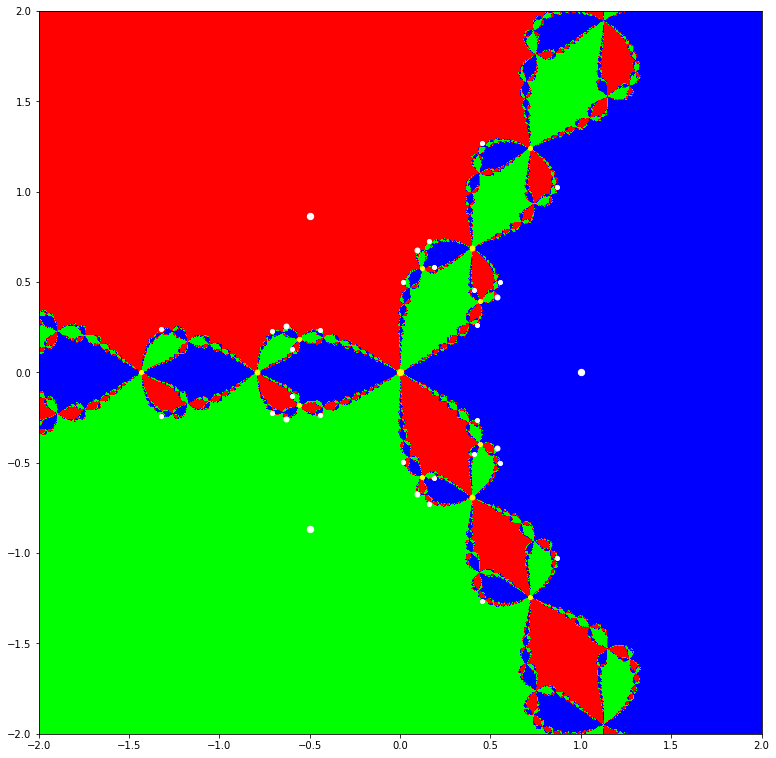

In [5]:
%matplotlib inline
figure(figsize=(13.3,13.3))  
# 800x800 takes ~10-20 minutes. Scale it down to 240 or so if you want to ever finish marking this thing
res = 800
roots = sp.solve(z**3-1)
x_range = np.linspace(-2, 2, res)
y_range = np.linspace(-2, 2, res)
X, Y = np.meshgrid(x_range, y_range)
z0s = X+Y*1j
for i in range(100):
    z0s = IT(z0s)

np.putmask(z0s, abs(z0s - roots[0]) < 0.01, 1)
np.putmask(z0s, abs(z0s - roots[1]) < 0.01, 2)
np.putmask(z0s, abs(z0s - roots[2]) < 0.01, 3)
    
plt.scatter(0, 0, s=40, c='yellow')
for i in two_iterations:
    plt.scatter(complex(i).real, complex(i).imag, s=25, c='yellow')
for i in three_iterations:
    plt.scatter(complex(i).real, complex(i).imag, s=17, c='yellow')
for i in period_1:
    plt.scatter(complex(i).real, complex(i).imag, s=40, c='w')
for i in period_2:
    plt.scatter(complex(i).real, complex(i).imag, s=25, c='w')
for i in period_3:
    plt.scatter(complex(i).real, complex(i).imag, s=17, c='w')
    
    
plt.imshow(z0s.real, extent=[-2, 2, -2, 2], cmap='brg')

## Marker Comment

* 4/4: Correct basins.
* 3/3: Correct periodic points.
* 3/3: Correct failure points.
* Bonus point, +1: Image is 800x800.

Your produces the right result, but it is possible to create the plot in a few seconds.

## Problem 2

In this problem we ask to you extend the code from **Part.II/Data.1.filled.ipynb**. As in class, load and parse the files in the **w.sask** and **w.vic** subdirectories to create the variable **mList**.  For this problem use the data from **mList**.

(a) Make a plot of daily precipitation, comparing two cities.  Make the plot for Saskatoon vs. Victoria.  On the x-axis you will have the daily precipitation for Victoria.  On the y-axis you will have the daily precipitation for Saskatoon.  Only plot dates where (in mList) we have precipitation data for both cities.  In particular, once you have combed through the data to find the precipitation data for the common dates, print a line in your python notebook of the form "Common data: n" where n is the number of days where we have precipitation data for both Victoria and Saskatoon.  

(b) Make a similar daily plot of mean temperatures of Victoria vs. Saskatoon.  Include the linear least squares interpolation in your plot. 

In [3]:
## Problem 2
import datetime as dt
import os
import fnmatch as fn
from operator import itemgetter

wsubdir = fn.filter(os.listdir('../../'), "w.*")
wsubdir = ['../../w.sask', '../../w.vic']
print("Weather subdirectories:", wsubdir)

## each file is of the form "key", "data" for several lines, then a blank space
## "Legend" then several (ignorable) lines, then a blank space
## "keys" separated by commas then
## remaining lines are the key values for each measurement. 

masterList = [] ## list of weather station dict objects

for wd in wsubdir:
    files = fn.filter(os.listdir(wd), "eng-daily*.csv")
    for wdf in files:
        with open('./'+wd+'/'+wdf, encoding='utf-8') as f:
            blanks=0
            content = f.readlines()
            FD = dict() ## file dict head.
            FL = [] ## file list.
            keys = []
            for LN in content:
                PL = LN.replace(u'\ufeff','').split(",")
                for i in range(len(PL)): # this removes the quotes around the numbers.
                    PL[i] = PL[i].translate({ord(c): None for c in '"\n'})
                if len(PL)==1 and PL[0]=='':
                    blanks+=1
                    if blanks==2 and PL[0]=='':
                        continue
                ## if blanks==0 we need to build the main dict
                ## if blanks==1 we ignore
                ## if blanks==2 we build the data.
                if blanks==0:
                    FD[PL[0]] = PL[1]
                    if PL[0]=="Station Name":
                        FD["Data"] = []
                if blanks==2:
                    if PL[0]=="Date/Time":
                        keys = PL
                    else:
                        FD["Data"].append( { keys[i] : PL[i] for i in range(len(keys)) } )
            masterList.append(FD)        

## make set of "Station Name"s. 
## use it to merge common station names into one (more useful) masterList.
sNames = { x['Station Name'] for x in masterList}
print("Station names:", sNames)

## return index of list of dict if dict keyed-element exists, -1 otherwise
def indIfExists(LOD, keyname, value):
    for i in range(len(LOD)):
        if LOD[i][keyname] == value:
            return i
    return -1

## run through masterlist, if that airport exists in mList we merge, if not, we copy it over.
mList = []
while len(masterList)>0:
    I = indIfExists(mList, 'Station Name', masterList[-1]['Station Name'])
    if I<0:
        mList.append(masterList.pop())
    else:
        mList[I]["Data"].extend(masterList.pop()["Data"])

for WS in mList:
    badItems = set()
    for i in range(len(WS["Data"])):
        ## Let's convert the dict from strings to appropriate datetime and float objects
        ## dates with bad data we will flag and remove.
        for key, value in WS["Data"][i].items():
            if key=="Date/Time":
                WS["Data"][i][key] = dt.datetime.strptime(value, "%Y-%m-%d")
            elif key in [ 'Min Temp (°C)', 'Total Precip (mm)',  \
                          'Max Temp (°C)', 'Mean Temp (°C)']:
                try:
                    WS["Data"][i][key] = float(value)
                except:
                    badItems.add( i )
    #print(len(WS["Data"]), end=" ")
    WS["Data"] = [WS["Data"][i] for i in range(len(WS["Data"])) if i not in badItems]
    #print(len(WS["Data"]), "\n")
    WS["Data"] = sorted(WS["Data"], key=itemgetter("Date/Time"))


Weather subdirectories: ['../../w.sask', '../../w.vic']
Station names: {"VICTORIA INT'L A", 'VICTORIA INTL A', "SASKATOON DIEFENBAKER INT'L A", 'SASKATOON SRC'}


[-0.02192146  1.0226729 ]
Common data: 15055


(0, 96.6)

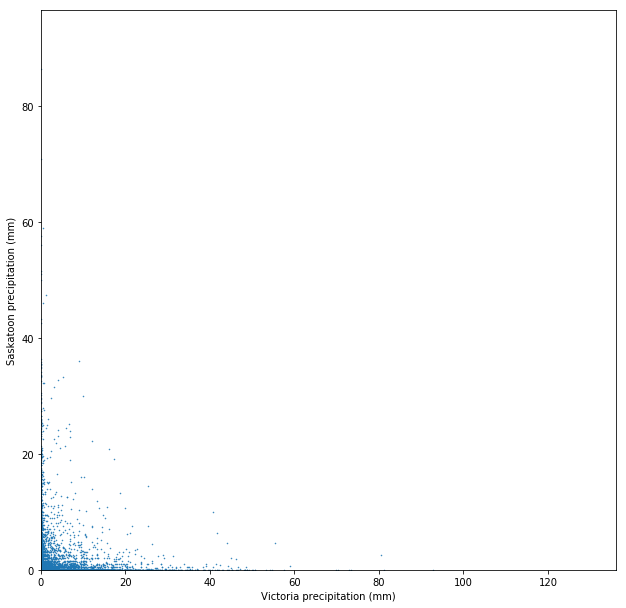

In [4]:
# (a)
vic_rain = {}
sask_rain = {}
# Victoria data is stored at index 0,2; Sask at 1,3
for j in range(len(mList)):
    if j%2 == 0:
        for i in range(len(mList[j]['Data'])):
            vic_rain[str(mList[j]['Data'][i]['Date/Time'].date())] = mList[j]['Data'][i]['Total Precip (mm)']
    else:
        for i in range(len(mList[j]['Data'])):
            sask_rain[str(mList[j]['Data'][i]['Date/Time'].date())] = mList[j]['Data'][i]['Total Precip (mm)']
plot_vic = []
plot_sask = []
for i in vic_rain:
    if i in sask_rain:
        plot_vic.append(vic_rain[i])
        plot_sask.append(sask_rain[i])

figure(figsize=(10.3,10.3))
print(np.polyfit(plot_vic, plot_sask, 1))
plot(plot_vic, plot_sask, '.', markersize=1)
print("Common data: {}".format(len(plot_sask)))
xlabel("Victoria precipitation (mm)")
ylabel("Saskatoon precipitation (mm)")
xlim(0, max(plot_vic))
ylim(0, max(plot_sask))

## Marker Comment

* 4/4: Correct algorithm to find common dates.
* 2.5/3: Good precipitation plot, but missing title.

[[-19.50239038]
 [  2.2183622 ]]
Common data: 15055


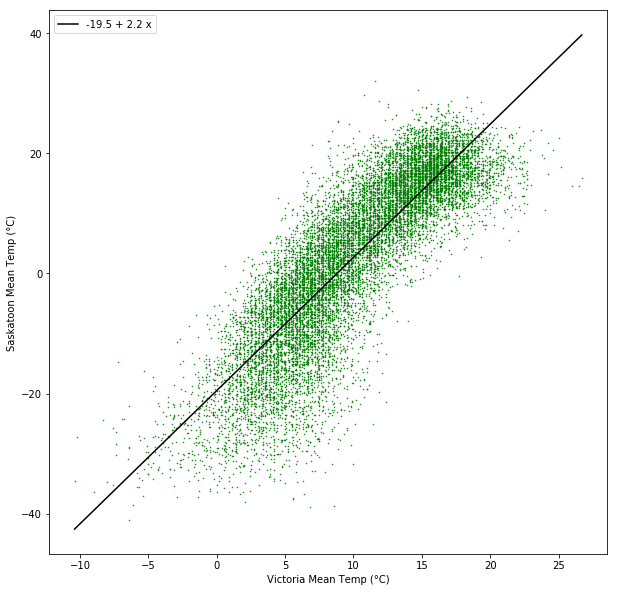

In [8]:
# (b)
import numpy as np

vic_rain = {}
sask_rain = {}
for j in range(len(mList)):
    if j%2 == 0:
        for i in range(len(mList[j]['Data'])):
            vic_rain[str(mList[j]['Data'][i]['Date/Time'].date())] = mList[j]['Data'][i]['Mean Temp (°C)']
    else:
        for i in range(len(mList[j]['Data'])):
            sask_rain[str(mList[j]['Data'][i]['Date/Time'].date())] = mList[j]['Data'][i]['Mean Temp (°C)']
plot_vic = []
plot_sask = []
for i in vic_rain:
    if i in sask_rain:
        plot_vic.append(vic_rain[i])
        plot_sask.append(sask_rain[i])

A = np.matrix([[1.0, x] for x in plot_vic]).T
y = np.matrix([y for y in plot_sask]).T
  
c = np.matmul(np.matmul(np.linalg.inv(np.matmul(A,A.T)), A), y) 
print(c)
c0=c[0,0]
c1=c[1,0]      

figure(figsize=(13.3,1.3))
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
plot(plot_vic, plot_sask, 'g.', markersize=1)
plt.plot([min(plot_vic), max(plot_vic)], [c0+c1*min(plot_vic), c0+c1*max(plot_vic)], color="black", label=str("%1.1f + %1.1f x" % (c0,c1)))
ax.legend(loc='upper left')

print("Common data: {}".format(len(plot_sask)))
xlabel("Victoria Mean Temp (°C)")
ylabel("Saskatoon Mean Temp (°C)")


## Marker Comment

* 2.5/3: Good temperature plot, but missing title.

Excellent use of legend!

## Problem 3

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a list, $L$, where the $k$-th element of the list is the number of times it takes to turn $k+1$ into $1$ by applying the function $f$.  

Now consider the function $T(k) = L[0] + L[1] + \cdots + L[k-1]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for a linear and quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?  

Linear fit coefficients for n=10000
86.6915322059
-36250.3557954
Quadratic fit coefficients for n=10000
0.0013324239455
73.365960327
-14036.6274733
Linear fit coefficients for n=100000
109.122835286
-332421.894473
Quadratic fit coefficients for n=100000
0.000127476533817
96.3750544273
-119954.630909


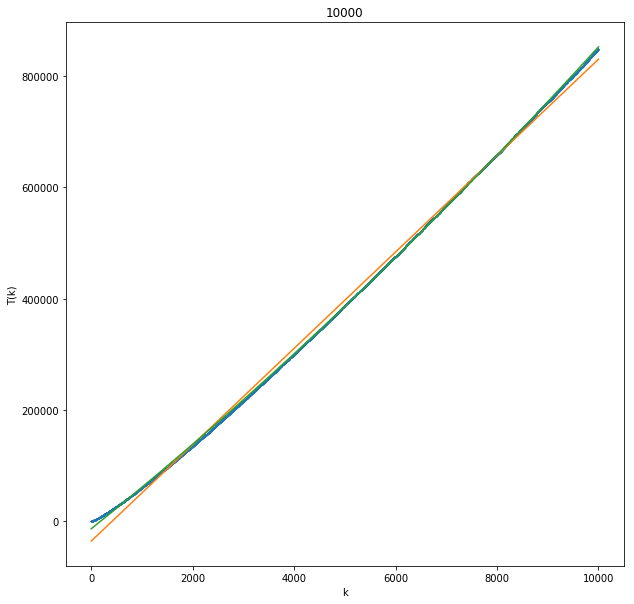

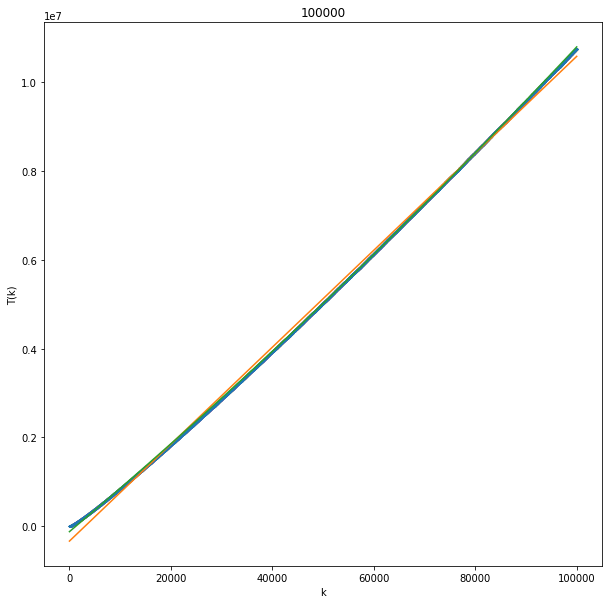

In [1]:
from matplotlib import pyplot as plt
import numpy as np


def t(n):
    count = 0
    while n != 1:
        n = int(n / 2) if n % 2 == 0 else int(3 * n + 1)
        count += 1
    return count


def pplot(n):
    nn = np.arange(1, n+1, 1)
    T = np.vectorize(t)
    L = T(nn)
    l = []

    for i in range(n):
        if i == 0:
            l.append(0)
        else:
            l.append(l[i-1]+L[i])

    plt.figure(figsize=(10, 10))
    plt.plot(l, '.', markersize=1)
    z = np.polyfit(nn, l, 1)
    zz = np.polyfit(nn, l, 2)
    domain = np.linspace(1, n, n)
    print("Linear fit coefficients for n={}".format(n))
    for i in z:
        print(i)
    print("Quadratic fit coefficients for n={}".format(n))
    for i in zz:
        print(i)
    y = lambda x: z[0] * x + z[1]
    yy = lambda x: zz[0] * x ** 2 + zz[1] * x + zz[2]
    plt.title(n)
    plt.plot(domain, y(domain))
    plt.plot(domain, yy(domain))
    plt.xlabel("k")
    plt.ylabel("T(k)")

pplot(10000)
pplot(100000)

## Marker Comment

* 4/4: Correct least squares fits.
* 2/2: Correct k=10,000 plot.
* 2/2: Correct k=100,000 plot.
* Small error, -0.5: I had to rerun your code to get the axis labels.

It looks like the fittings are converging, yes.

## Marker Comment

* 0/2: Wrong answer. No work or effort shown.